In [1]:
import os, glob
from astropy.io import fits

from BreyoSpec import BreyoSpec

In [2]:
#files = "C:\\Users\\noahf\\Documents\\School\\Junior-Semester-1\\ObsAstro\\2021-11-03\\duringTransitOutput\\WASP-93b-2a_20211104T010459.fit"
files = '/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/'
paths = glob.glob(files+"*")
print(paths)

['/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/WASP-93b-3e_20211104T031443.fit', '/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/WASP-93b-3d_20211104T030940.fit', '/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/WASP-93b-3a_20211104T025316.fit', '/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/WASP-93b-3b_20211104T025933.fit', '/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/WASP-93b-3c_20211104T030436.fit']


In [3]:
spec = BreyoSpec(paths)

import matplotlib.pyplot as plt

3824 3824


4430 4430


4209 4209


4193 4193


3995 3995


/home/ubuntu/Documents/ObsAstro/ExoSpec/BreyoSpec.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.flux = np.array(normFluxes)
/home/ubuntu/Documents/ObsAstro/ExoSpec/BreyoSpec.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.wave = np.array(normWaves)


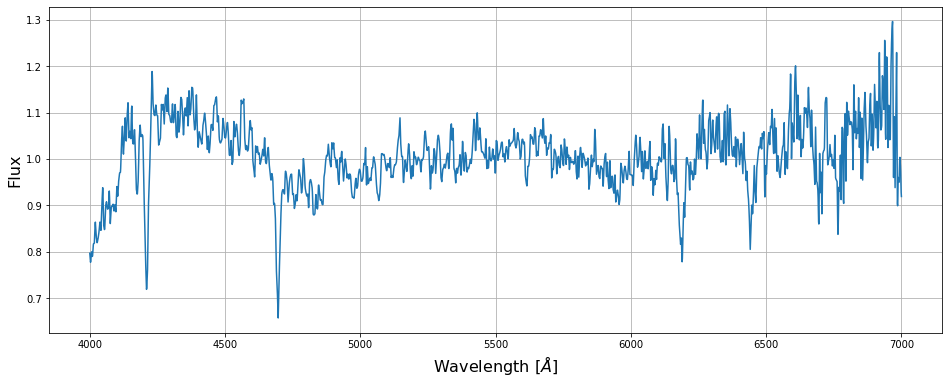

In [4]:
spec.plot()